# 01 Importing Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/Dena/Instacart Basket Analysis'

In [4]:
# import merged data
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_grouped_2.pkl'))

# check the output
df_merged.head()

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,Regularly busy,Mid-range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,No,196,1,1,...,Regularly busy,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,No,196,1,1,...,Regularly busy,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,No,196,1,1,...,Least busy,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,No,196,1,1,...,Least busy,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 02 Data Visualization

<AxesSubplot:>

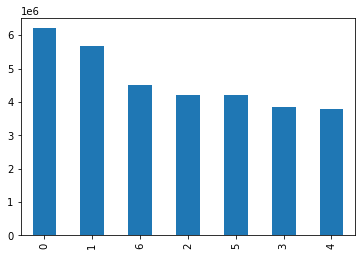

In [5]:
# make a bar chart
df_merged['orders_day_of_week'].value_counts().plot.bar()

Text(0.5, 0, 'Saturday through Friday')

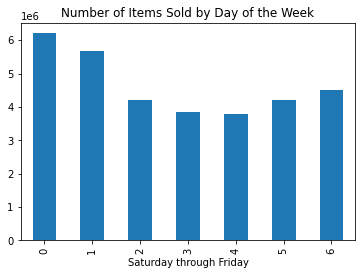

In [35]:
# keep the original sorting
df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title("Number of Items Sold by Day of the Week")
plt.xlabel("Saturday through Friday")

In [7]:
# you can keep the orignal sorting when printing frequencies, too
df_merged['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

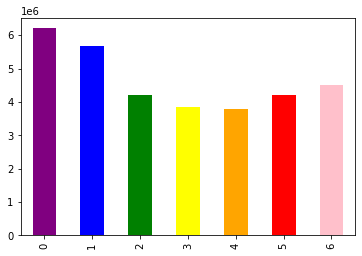

In [8]:
# add colors!
df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'pink'])

Text(0.5, 0, 'Saturday through Friday')

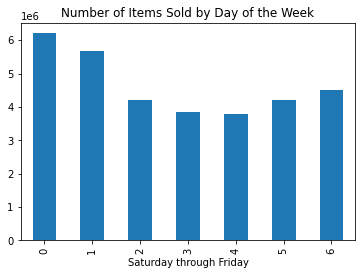

In [38]:
# save the bar chart to Jupyter's memory
bar = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title("Number of Items Sold by Day of the Week")
plt.xlabel("Saturday through Friday")

In [39]:
# export the bar chart to the computer
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'),bbox_inches = "tight")

<AxesSubplot:ylabel='Frequency'>

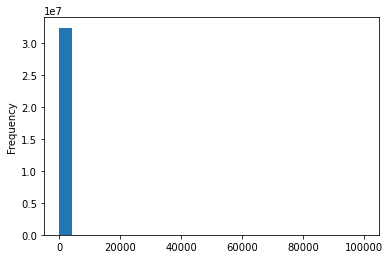

In [11]:
# make a histogram
df_merged['prices'].plot.hist(bins = 25)

In [12]:
# something is wrong... check the data
df_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df_merged['prices'].mean()

11.980225638467232

In [14]:
df_merged['prices'].median()

7.4

In [15]:
df_merged['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

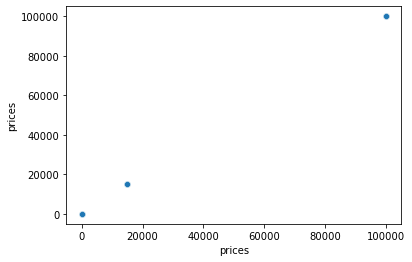

In [16]:
# make a scatterplot to identify outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_merged)

In [17]:
# check for unusual prices (greater than 100)
df_merged.loc[df_merged['prices'] > 100]

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag
10030345,912404,17,12,2,14,5.0,No,21553,5,0,...,Regularly busy,High-range product,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,No,21553,3,1,...,Regularly busy,High-range product,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,No,21553,6,0,...,Regularly busy,High-range product,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,No,21553,3,1,...,Busiest day,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,No,21553,9,0,...,Regularly busy,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,No,33664,1,0,...,Busiest day,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,No,33664,1,1,...,Busiest day,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,No,33664,25,0,...,Regularly busy,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,No,33664,8,0,...,Regularly busy,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [18]:
# turn these strange prices into missing values
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [19]:
# check the new maximum price
df_merged['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

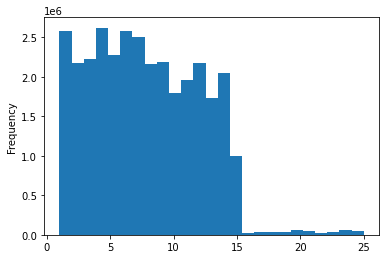

In [20]:
# redo the histogram
df_merged['prices'].plot.hist(bins = 25)

Text(0.5, 0, 'Price in Dollars')

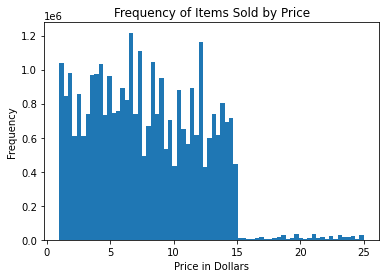

In [23]:
# make thinner columns (increase granularity)
# this allows us to see more variety in the histogram
df_merged['prices'].plot.hist(bins = 70)
plt.title("Frequency of Items Sold by Price")
plt.xlabel("Price in Dollars")

Text(0.5, 0, 'Price in Dollars')

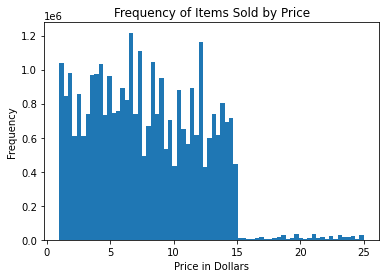

In [24]:
# save the histogram
hist = df_merged['prices'].plot.hist(bins = 70)
plt.title("Frequency of Items Sold by Price")
plt.xlabel("Price in Dollars")

In [25]:
# export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'),bbox_inches="tight")

In [26]:
# create a list of random floating numbers between 0 and 1 in order to create a sample
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# split the dataframe into 2 samples (70% big and 30% small)
big = df_merged[dev]
small = df_merged[~dev]

In [29]:
# check to make sure the sizes of big and small add to the size of the data frame
len(df_merged)

32404859

In [30]:
len(big) + len(small)

32404859

In [31]:
# speed up the process by creating a mini data frame with only what is necessary
df_2 = small[['orders_day_of_week','prices']]

In [32]:
# check the output 
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


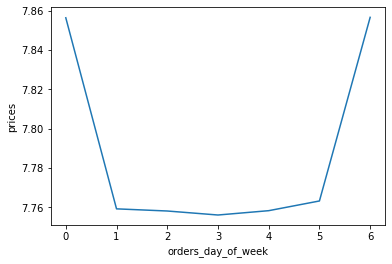

In [33]:
# create the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [34]:
# why am I getting a different shape than in the example?